## 第2章 データを可視化し分析を行う10本ノック

### ノック11 : データを読み込んで不要なものを除外しよう

In [11]:
import pandas as pd

order_data = pd.read_csv('../data/order_data.csv')

display(len(order_data))

order_data.head()

703880

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


#### 絞り込み結果

In [12]:
order_data = order_data.loc[(order_data['status'] == 1) | (order_data['status'] == 2)]

display(len(order_data))

order_data.head()

574436

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


#### 分析用データ

In [13]:
analyze_data = order_data[[
    'store_id',
    'customer_id',
    'coupon_cd',
    'order_accept_date',
    'delivered_date',
    'total_amount',
    'store_name',
    'wide_area',
    'narrow_area',
    'takeout_name',
    'status_name',
]]

display(len(analyze_data))

analyze_data.head()

574436

,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済


### ノック12 : データの全体像を把握しよう

#### 分析用データの統計量

In [14]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


#### 分析用データのデータ型(変換前)

In [15]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

#### 分析用データのデータ型(変換後)

In [16]:
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

/var/folders/4t/3fc4ys414zj13301xv2kg7_00000gn/T/ipykernel_88381/468490364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)


store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

### ノック13 : 月別の売上を集計してみよう

#### 注文受付日時の編集

In [19]:
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])

analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')

analyze_data[['order_accept_date', 'order_accept_month']].head()

/var/folders/4t/3fc4ys414zj13301xv2kg7_00000gn/T/ipykernel_88381/3069543327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
/var/folders/4t/3fc4ys414zj13301xv2kg7_00000gn/T/ipykernel_88381/3069543327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')


,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004


#### 配達完了日時の編集

In [20]:
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])

analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')

analyze_data[['delivered_date', 'delivered_month']].head()

/var/folders/4t/3fc4ys414zj13301xv2kg7_00000gn/T/ipykernel_88381/590282719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
/var/folders/4t/3fc4ys414zj13301xv2kg7_00000gn/T/ipykernel_88381/590282719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')


,delivered_date,delivered_month
0,2020-04-01 11:18:00,202004
1,2020-04-01 11:22:00,202004
2,2020-04-01 11:15:00,202004
3,2020-04-01 11:16:00,202004
4,2020-04-01 11:53:00,202004


#### 日時のデータ型確認

In [21]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

#### 月別の統計データ

In [27]:
month_data = analyze_data.groupby('order_accept_month')
display(month_data.describe())

order_accept_date                                 \
                               count                           mean   
order_accept_month                                                    
202004                        189414  2020-04-16 04:47:05.948319744   
202005                        195684  2020-05-16 16:28:14.952520704   
202006                        189338  2020-06-16 04:36:51.587542272   

                                                                        \
                                    min                            25%   
order_accept_month                                                       
202004              2020-04-01 11:00:00  2020-04-08 16:36:51.249999872   
202005              2020-05-01 11:00:00            2020-05-08 19:14:14   
202006              2020-06-01 11:00:00            2020-06-08 16:37:37   

                                                              \
                                    50%                  75%   
order_accept_month                                             
202004              2020-04-16 11:08:08  2020-04-23 16:44:44   
202005              2020-05-16 16:25:25  2020-05-24 13:44:44   
202006              2020-06-16 11:01:01  2020-06-23 16:28:28   

                                             delivered_date  \
                                    max  std          count   
order_accept_month                                            
202004              2020-04-30 21:58:58  NaN         189414   
202005              2020-05-31 21:58:58  NaN         195684   
202006              2020-06-30 21:58:58  NaN         189338   

                                                   ...                       \
                                             mean  ...                  max   
order_accept_month                                 ...                        
202004              2020-04-16 05:21:27.247695360  ...  2020-04-30 22:55:57   
202005              2020-05-16 17:02:31.636153344  ...  2020-05-31 23:02:43   
202006              2020-06-16 05:11:12.825433856  ...  2020-06-30 22:55:56   

                        total_amount                                      \
                    std        count         mean    min     25%     50%   
order_accept_month                                                         
202004              NaN     189414.0  2959.440638  698.0  2308.0  2808.0   
202005              NaN     195684.0  2960.327799  698.0  2308.0  2808.0   
202006              NaN     189338.0  2960.486437  698.0  2308.0  2808.0   

                                                
                       75%     max         std  
order_accept_month                              
202004              3586.0  5100.0  954.271169  
202005              3586.0  5100.0  954.823248  
202006              3617.0  5100.0  953.740057  

[3 rows x 24 columns]

In [29]:
month_data['total_amount'].sum()

order_accept_month
202004    560559489
202005    579288785
202006    560532581
Name: total_amount, dtype: int64

### ノック14 : 月別の推移を可視化してみよう

#### 月別の売上合計推移

<Axes: xlabel='order_accept_month'>

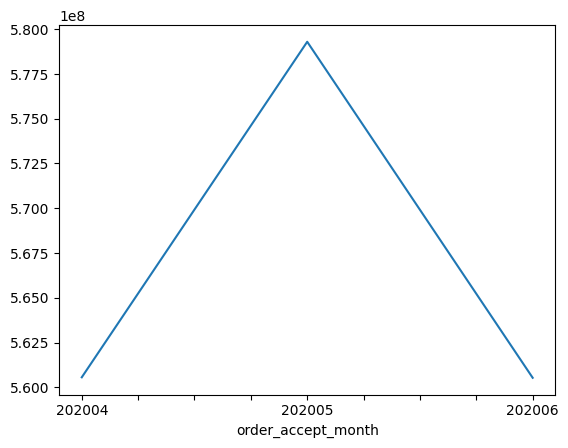

In [30]:
month_data['total_amount'].sum().plot()

#### 月別の平均額推移

<Axes: xlabel='order_accept_month'>

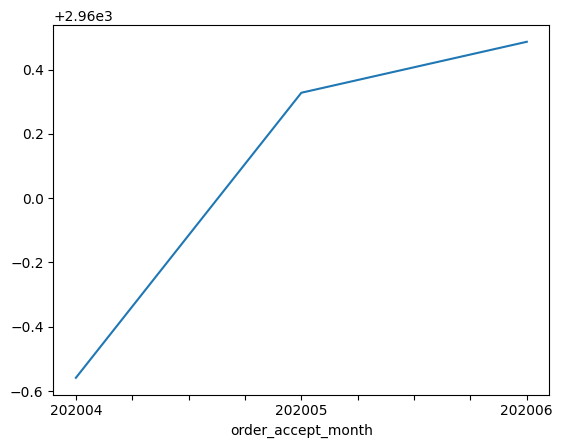

In [31]:
month_data['total_amount'].mean().plot()

### ノック15 : 売上からヒストグラムを作成してみよう

In [32]:
import matplotlib.pyplot as plt

#### ヒストグラムの表示

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

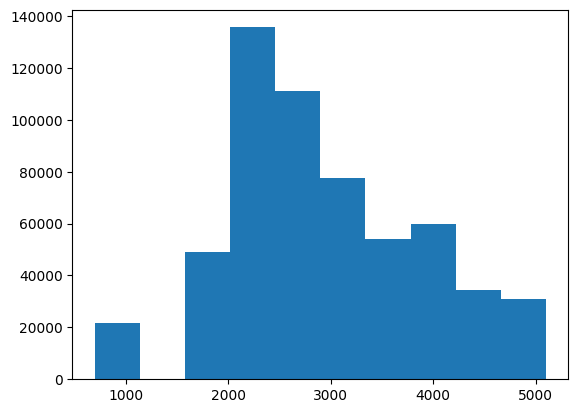

In [33]:
plt.hist(analyze_data['total_amount'])

(array([10728., 10796.,     0.,     0.,     0.,     0., 48969., 11599.,
        56668., 67397., 35164., 53635., 33642., 29657., 36741., 11219.,
        31284., 24269., 23524., 23664.,    75., 11151., 45817.,     0.,
         8437.]),
 array([ 698.  ,  874.08, 1050.16, 1226.24, 1402.32, 1578.4 , 1754.48,
        1930.56, 2106.64, 2282.72, 2458.8 , 2634.88, 2810.96, 2987.04,
        3163.12, 3339.2 , 3515.28, 3691.36, 3867.44, 4043.52, 4219.6 ,
        4395.68, 4571.76, 4747.84, 4923.92, 5100.  ]),
 <BarContainer object of 25 artists>)

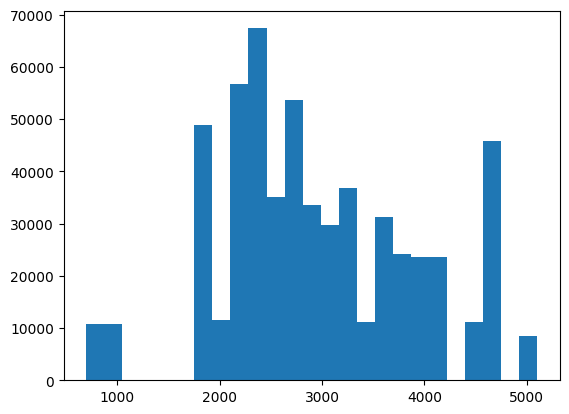

In [37]:
plt.hist(analyze_data['total_amount'], bins=25)

### ノック16 : 都道府県の売上を集計して可視化しよう

#### 都道府県別の売上

In [39]:
pre_data = pd.pivot_table(analyze_data, index='order_accept_month', columns='narrow_area', values='total_amount', aggfunc='mean')
pre_data

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062000,2976.519634,2960.592173,2992.173548,2948.001171,2942.046543,2947.479814
202005,2953.545504,2977.290771,2962.603059,2998.165682,2949.597054,2948.269611,2941.796835
202006,2955.761885,2976.988380,2962.949987,2991.542844,2950.520464,2945.504744,2935.951783


#### 都道府県別売上のグラフ

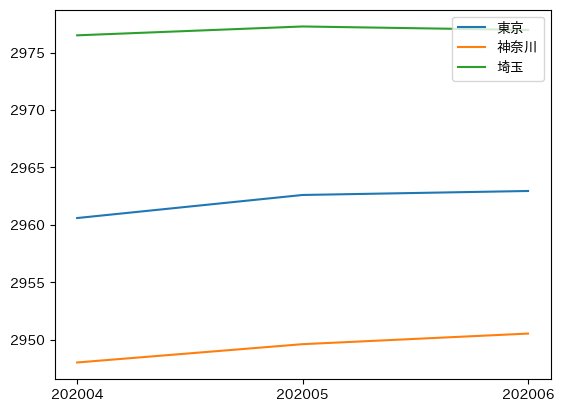

In [46]:
import japanize_matplotlib

plt.plot(list(pre_data.index), pre_data['東京'], label='東京')
plt.plot(list(pre_data.index), pre_data['神奈川'], label='神奈川')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='埼玉')

plt.legend()

### ノック17 : クラスタリングに向けてデータを加工しよう

#### 店舗別の統計量

In [65]:
store_clustering = analyze_data.groupby(['store_id'])['total_amount'].agg(['size', 'mean', 'median', 'max', 'min'])
store_clustering.reset_index(inplace=True, drop=True)
display(len(store_clustering))
store_clustering.head()

196

,size,mean,median,max,min
0,2877,3129.834897,3050.0,5100,1857
1,2294,2989.003923,2677.0,5100,698
2,3776,2947.170286,2808.0,5100,698
3,1740,3074.770115,2877.0,4744,1899
4,2760,2845.661594,2791.0,4744,698


#### 店舗の分布

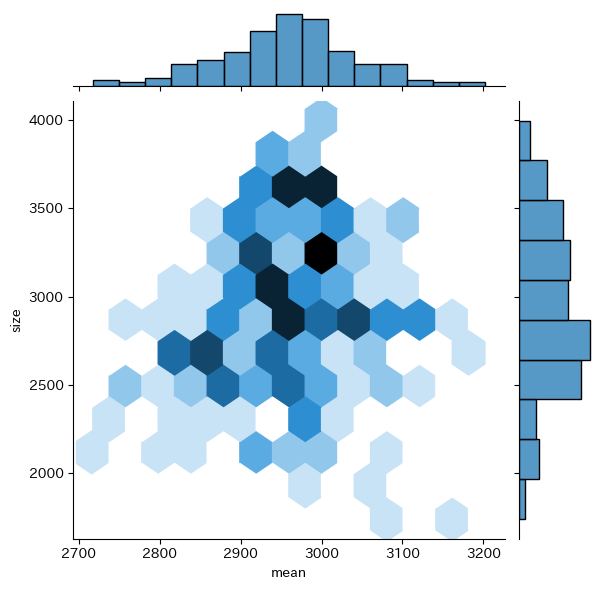

In [68]:
import seaborn as sns

hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='hex')

### ノック18 : クラスタリングで店舗をグループ化してみよう

#### クラスタリング

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)

clusters = kmeans.fit(store_clustering_sc)

store_clustering['cluster'] = clusters.labels_

display(store_clustering['cluster'].unique())

store_clustering.head()

array([3, 2, 1, 0], dtype=int32)

,size,mean,median,max,min,cluster
0,2877,3129.834897,3050.0,5100,1857,3
1,2294,2989.003923,2677.0,5100,698,2
2,3776,2947.170286,2808.0,5100,698,1
3,1740,3074.770115,2877.0,4744,1899,3
4,2760,2845.661594,2791.0,4744,698,2


### ノック19 : ブループの傾向を分析してみよう

In [73]:
store_clustering.columns = ['月内件数', '月内平均値', '月内中央値', '月内最大値', '月内最小値', 'cluster']
store_clustering.groupby('cluster').count()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,29,29,29,29,29
1,102,102,102,102,102
2,50,50,50,50,50
3,15,15,15,15,15


In [74]:
store_clustering.groupby('cluster').mean()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,2622.034483,2968.63881,2830.0,4730.965517,797.724138
1,3209.921569,2987.074862,2836.019608,5096.509804,740.529412
2,2679.680000,2858.260111,2696.2,4781.74,717.28
3,2466.733333,3078.469212,2904.0,4886.4,1819.2


#### ノック20 : クラスタリングの結果をt-SNEで可視化してみよう

#### t-SNE による次元削減

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

x = tsne.fit_transform(store_clustering_sc)

tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']
tsne_df.columns = ['axis_0', 'axis_1', 'cluster', ]
tsne_df.head()

,axis_0,axis_1,cluster
0,3.378835,4.382357,3
1,-11.203486,5.710292,2
2,-11.733822,-6.624405,1
3,5.992307,4.862614,3
4,18.022877,1.836355,2


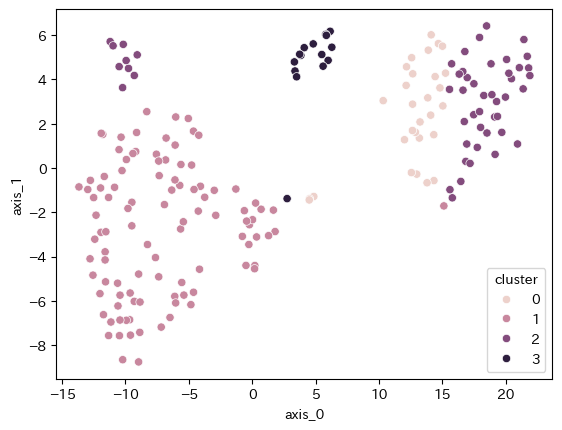

In [79]:
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)